In [142]:
using BenchmarkTools
using Plots
Plots.PlotlyBackend();

## Taylor Series
$$ 
\sum_{n=0}^\infty \frac{f^{(n)} (a)}{n!} (x-a)^n
$$

In [117]:
# looping trig derivatives evaluated at 0 
@show sin(0)
@show cos(0)
@show -sin(0)
@show -cos(0);

sin(0) = 0.0
cos(0) = 1.0
-(sin(0)) = -0.0
-(cos(0)) = -1.0


## Building Sine from Taylor Series
$$ 
sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!}  - \cdots
$$

In [118]:
function my_sine(x)
    n = 1
    number_of_terms = 15
    result = 0
    sign = 1
    while n < number_of_terms
        result += sign*x^n/factorial(n)
        n += 2
        sign = sign*-1
    end
    result    
end

my_sine (generic function with 1 method)

In [135]:
@btime my_sine(π/8)

  430.085 ns (0 allocations: 0 bytes)


0.3826834323650897

In [136]:
@btime sin(π/8)

  1.449 ns (0 allocations: 0 bytes)


0.3826834323650898

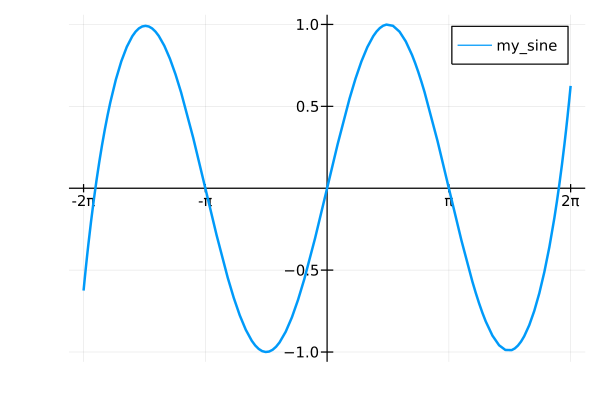

In [121]:
# plot my_sine over [-2pi,2pi]
plot(my_sine,
    label = "my_sine",
    -2π, 2π,
    thickness_scaling = 1.25,
    linewidth = 2,
    framestyle = :origin, 
    xticks = ([-2π:π:2π;], 
              ["-2π", "-π", "0", "π", "2π"])) 

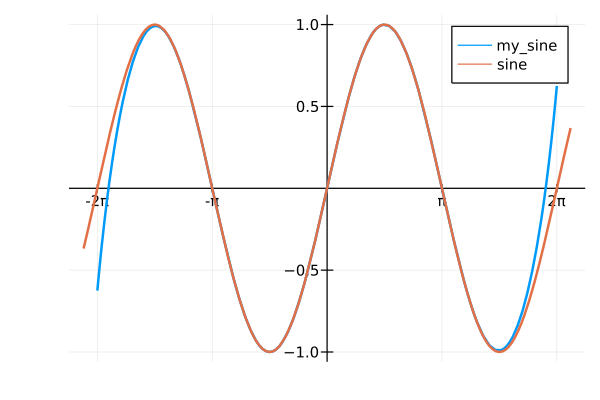

In [122]:
# compare to julia implementation of sine
plot!(sin, linewidth = 2, label = "sine")

## Building Cosine from Taylor Series
$$
cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!}  - \cdots
$$

In [123]:
function my_cosine(x)
    n = 0
    number_of_terms = 15
    result = 0
    sign = 1
    while n < number_of_terms
        result += sign*x^n/factorial(n)
        n += 2
        sign = sign*-1
    end
    result    
end

my_cosine (generic function with 1 method)

In [137]:
@btime my_cosine(π/8)

  448.141 ns (0 allocations: 0 bytes)


0.9238795325112867

In [138]:
@btime cos(π/8)

  1.449 ns (0 allocations: 0 bytes)


0.9238795325112867

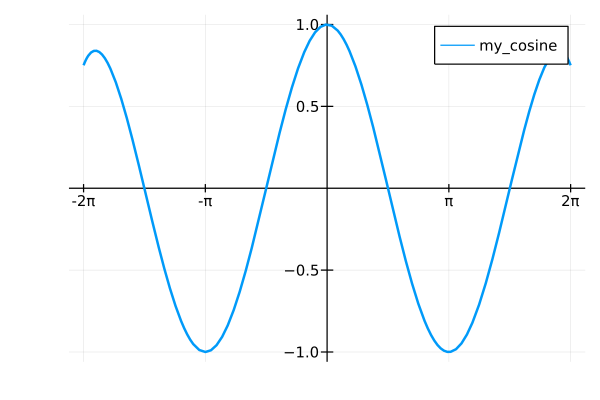

In [126]:
# plot my_cosine over [-2pi,2pi]
plot(my_cosine,
    label = "my_cosine",
    -2π, 2π,
    thickness_scaling = 1.25,
    linewidth = 2,
    framestyle = :origin, 
    xticks = ([-2π:π:2π;], 
              ["-2π", "-π", "0", "π", "2π"])) 

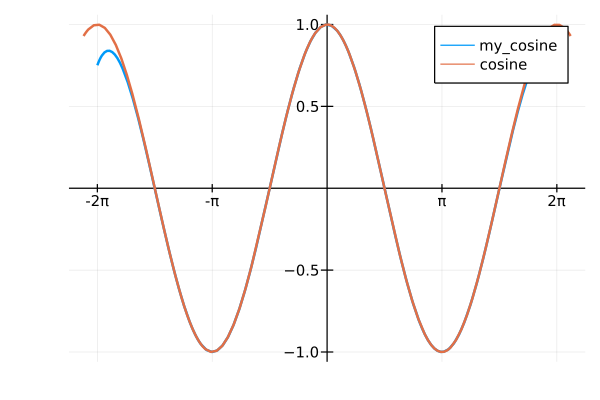

In [127]:
# compare to julia implementation of cosine
plot!(cos, linewidth = 2, label = "cosine")

## Building Tangent from Sine and Cosine
$$
tan(x) = \frac{sin(x)}{cos(x)}
$$

In [128]:
function my_tangent(x)
    result = my_sine(x)/my_cosine(x)
end

my_tangent (generic function with 1 method)

In [140]:
@btime my_tangent(π/8)

  875.370 ns (0 allocations: 0 bytes)


0.41421356237309503

In [141]:
@btime tan(π/8)

  7.746 ns (0 allocations: 0 bytes)


0.41421356237309503

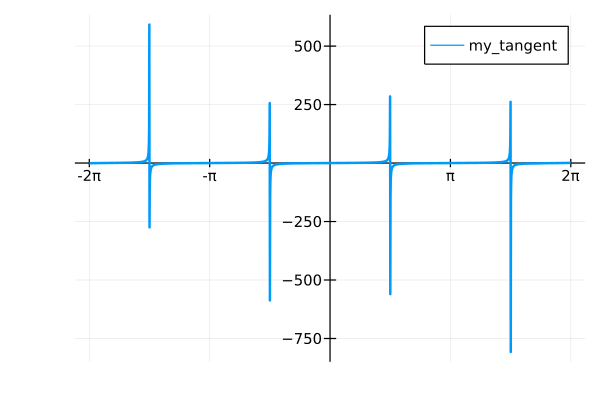

In [129]:
# plot my_tangent over [-2pi,2pi]
plot(my_tangent,
    label = "my_tangent",
    -2π, 2π,
    thickness_scaling = 1.25,
    linewidth = 2,
    framestyle = :origin, 
    xticks = ([-2π:π:2π;], 
              ["-2π", "-π", "0", "π", "2π"])) 

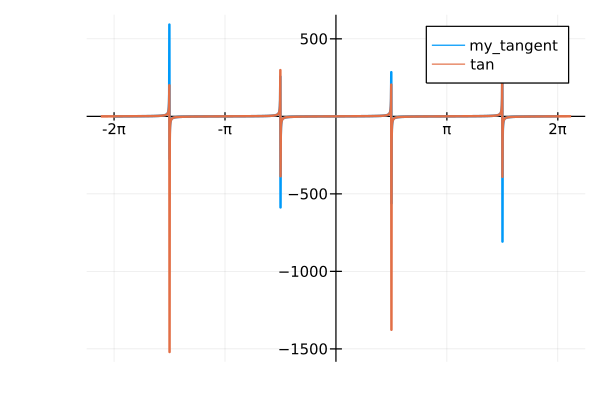

In [130]:
# compare to julia implementation of tan
plot!(tan, linewidth = 2, label = "tan")

## Take a look at Julia's built in Sine function

In [144]:
?sin

search: sin sinh sind sinc sinpi sincos sincosd sincospi asin using isinf asinh



```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

---

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```


In [145]:
methods(sin)

# 13 methods for generic function "sin":
[1] sin(a::Float16) in Base.Math at math.jl:1159
[2] sin(a::ComplexF16) in Base.Math at math.jl:1160
[3] sin(z::Complex{T}) where T in Base at complex.jl:831
[4] sin(x::T) where T<:Union{Float32, Float64} in Base.Math at special/trig.jl:29
[5] sin(::Missing) in Base.Math at math.jl:1206
[6] sin(x::BigFloat) in Base.MPFR at mpfr.jl:728
[7] sin(x::Real) in Base.Math at math.jl:404
[8] sin(A::LinearAlgebra.Hermitian{var"#s831", S} where {var"#s831"<:Complex, S<:(AbstractMatrix{var"#s832"} where var"#s832"<:var"#s831")}) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:925
[9] sin(A::Union{LinearAlgebra.Hermitian{var"#s832", S}, LinearAlgebra.Symmetric{var"#s832", S}} where {var"#s832"<:Real, S}) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:921
[10] sin(D::LinearAlgebra.Diagonal) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/diagonal.jl:610
[11] sin(A::AbstractMatrix{var"#s832"} where var"#s832"<:Real) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/dense.jl:870
[12] sin(A::AbstractMatrix{var"#s832"} where var"#s832"<:Complex) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/dense.jl:877
[13] sin(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.6.1/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:174

In [152]:
@less sin(pi/4)

# This file is a part of Julia. Except for the *_kernel functions (see below),
# license is MIT: https://julialang.org/license

struct DoubleFloat64
    hi::Float64
    lo::Float64
end
struct DoubleFloat32
    hi::Float64
end

# sin_kernel and cos_kernel functions are only valid for |x| < pi/4 = 0.7854
# translated from openlibm code: k_sin.c, k_cos.c, k_sinf.c, k_cosf.c.
# atan functions are based on openlibm code: s_atan.c, s_atanf.c.
# acos functions are based on openlibm code: e_acos.c, e_acosf.c.
# asin functions are based on openlibm code: e_asin.c, e_asinf.c. The above
# functions are made available under the following licence:

## Copyright (C) 1993 by Sun Microsystems, Inc. All rights reserved.
##
## Developed at SunPro, a Sun Microsystems, Inc. business.
## Permission to use, copy, modify, and distribute this
## software is freely granted, provided that this notice
## is preserved.

# Trigonometric functions
# sin methods
@noinline sin_domain_error(x) = throw(DomainError(x, "

@inline arc_tRt(t) = arc_p(t)/arc_q(t)


@inline function asin_kernel(t::Float64, x::Float64)
    # we use that for 1/2 <= x < 1 we have
    #     asin(x) = pi/2-2*asin(sqrt((1-x)/2))
    # Let y = (1-x), z = y/2, s := sqrt(z), and pio2_hi+pio2_lo=pi/2;
    # then for x>0.98
    #     asin(x) = pi/2 - 2*(s+s*z*R(z))
    #         = pio2_hi - (2*(s+s*z*R(z)) - pio2_lo)
    # For x<=0.98, let pio4_hi = pio2_hi/2, then
    #     f = hi part of s;
    #     c = sqrt(z) - f = (z-f*f)/(s+f)     ...f+c=sqrt(z)
    #  and
    #     asin(x) = pi/2 - 2*(s+s*z*R(z))
    #         = pio4_hi+(pio4-2s)-(2s*z*R(z)-pio2_lo)
    #         = pio4_hi+(pio4-2f)-(2s*z*R(z)-(pio2_lo+2c))
    pio2_lo = 6.12323399573676603587e-17
    s = sqrt_llvm(t)
    tRt = arc_tRt(t)
    if abs(x) >= 0.975 # |x| > 0.975
        return flipsign(pi/2 - (2.0*(s + s*tRt) - pio2_lo), x)
    else
        s0 = reinterpret(Float64, (reinterpret(UInt64, s) >> 32) << 32)
        c = (t - s0*s0)/(s + s0)
        p = 2.0*s*tRt - (pio

## Conclusion

1. From the graphs you can see my trig function approximations are accurate between π and -π, so code to scale anything out of this range would need to be implemented to increase functionality.

2. The built-in functions use pre-calculated coefficients as constants to decrease runtime:


    # Coefficients in 13th order polynomial approximation on [0; π/4] 
    # sin(x) ≈ x + S1*x³ + S2*x⁵ + S3*x⁷ + S4*x⁹ + S5*x¹¹ + S6*x¹³
    # D for double, S for sin, number is the order of x-1
    const DS1 = -1.66666666666666324348e-01
    const DS2 = 8.33333333332248946124e-03
    const DS3 = -1.98412698298579493134e-04
    const DS4 = 2.75573137070700676789e-06
    const DS5 = -2.50507602534068634195e-08
    const DS6 = 1.58969099521155010221e-10 
 